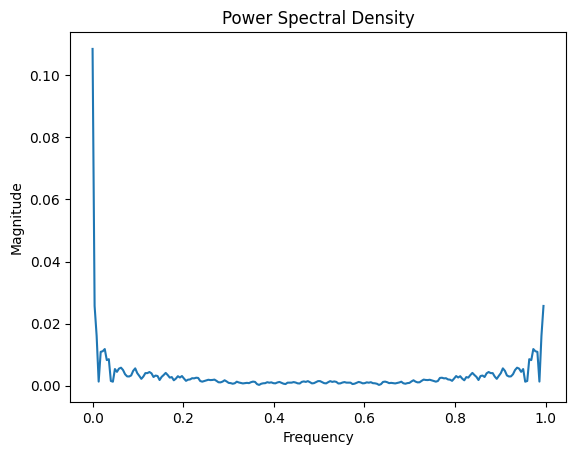

/Users/averydrennan/PF-ObjectHierarchy/PF_Estimation/.venv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


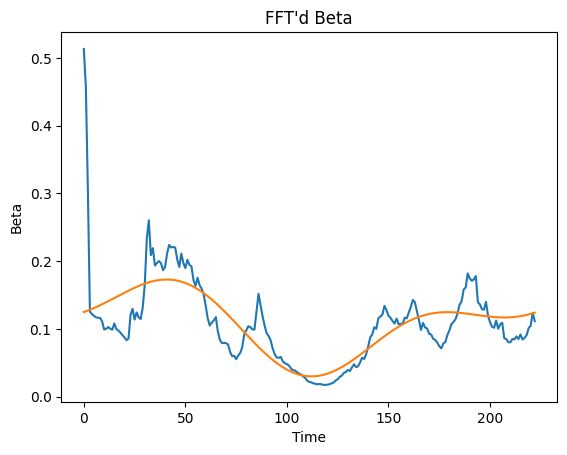

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

real_beta = pd.read_csv('/Users/averydrennan/PF-ObjectHierarchy/PF_Estimation/output/average_beta.csv')
real_beta = np.squeeze(real_beta.to_numpy()) 
real_beta = np.delete(real_beta,0,1)

f = real_beta.squeeze()

t = len(real_beta)
f_hat = np.fft.fft(f,t)
PSD = np.abs(f_hat/t)
freq = 1/t  * np.arange(t)

plt.title("Power Spectral Density")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.plot(freq,PSD)
plt.show()

indices = PSD > 0.015

PSD_clean = PSD * indices
f_hat = indices * f_hat
f_clean = np.fft.ifft(f_hat)

plt.title("FFT'd Beta")
plt.xlabel("Time")
plt.ylabel("Beta")
plt.plot(real_beta)
plt.plot(np.arange(t),f_clean)
plt.show()
